In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import atus_tools as att
plt.rcParams["figure.figsize"] = 18,10
pd.set_option('display.max_columns',500)

# Read in data

In [2]:
activity = pd.read_csv("data/atusact_2014.dat")
cps = pd.read_csv("data/atuscps_2014.dat")
respondants = pd.read_csv("data/atusresp_2014.dat")
roster = pd.read_csv("data/atusrost_2014.dat")
elder_care = pd.read_csv("data/atusrostec_2014.dat")
summary = pd.read_csv("data/atussum_2014.dat")
who = pd.read_csv("data/atuswho_2014.dat")

In [3]:
print(activity.shape)
activity.head()

(223249, 29)


,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,-1,0,540,540,1,0,0,97,540,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,-1,0,30,30,1,0,0,0,570,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,-1,60,60,60,1,0,0,0,630,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,-1,10,10,10,1,0,0,0,640,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,-1,30,30,30,1,0,0,0,670,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [4]:
print(cps.shape)
cps.head()

(68198, 382)


,TUCASEID,TULINENO,GEPSEUCL,GEPSEUST,GEREG,GEDIV,GESTFIPS,GTMETSTA,HEFAMINC,HEHOUSUT,HEPHONEO,HETELAVL,HETELHHD,HETENURE,HRHHID,HRHHID2,HRHTYPE,HRINTSTA,HRLONGLK,HRMIS,HRMONTH,HRNUMHOU,HRYEAR4,HUBUS,HUBUSL1,HUBUSL2,HUBUSL3,HUBUSL4,HUFINAL,HUINTTYP,HUPRSCNT,HURESPLI,HUTYPB,HUTYPC,HUTYPEA,HXFAMINC,HXHOUSUT,HXPHONEO,HXTELAVL,HXTELHHD,HXTENURE,OCCURNUM,PEABSPDO,PEABSRSN,PEAFEVER,PEAFNOW,PEAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PECOHAB,PECYC,PEDADTYP,PEDIPGED,PEDISDRS,PEDISEAR,PEDISEYE,PEDISOUT,PEDISPHY,PEDISREM,PEDW4WK,PEDWAVL,PEDWAVR,PEDWLKO,PEDWLKWK,PEDWRSN,PEDWWK,PEDWWNTO,PEEDUCA,PEERN,PEERNCOV,PEERNH1O,PEERNH2,PEERNHRO,PEERNHRY,PEERNLAB,PEERNPER,PEERNRT,PEERNUOT,PEERNWKP,PEFNTVTY,PEGR6COR,PEGRPROF,PEHGCOMP,PEHRACT1,PEHRACT2,PEHRACTT,PEHRAVL,PEHRFTPT,PEHRRSN1,PEHRRSN2,PEHRRSN3,PEHRUSL1,PEHRUSL2,PEHRUSLT,PEHRWANT,PEHSPNON,PEIO1COW,PEIO1ICD,PEIO1OCD,PEIO2COW,PEIO2ICD,PEIO2OCD,PEJHRSN,PEJHWANT,PEJHWKO,PELAYAVL,PELAYDUR,PELAYFTO,PELAYLK,PELKAVL,PELKDUR,PELKFTO,PELKLL1O,PELKLL2O,PELKLWO,PELKM1,PELNDAD,PELNMOM,PEMARITL,PEMJNUM,PEMJOT,PEMLR,PEMNTVTY,PEMOMTYP,PEMS123,PENATVTY,PENLFACT,PENLFJH,PENLFRET,PEPARENT,PERET1,PERRP,PESCHENR,PESCHFT,PESCHLVL,PESEX,PESPOUSE,PRABSREA,PRAGNA,PRCITFLG,PRCITSHP,PRCIVLF,PRCOW1,PRCOW2,PRCOWPG,PRDISC,PRDISFLG,PRDTCOW1,PRDTCOW2,PRDTHSP,PRDTIND1,PRDTIND2,PRDTOCC1,PRDTOCC2,PREMP,PREMPHRS,PREMPNOT,PRERELG,PRERNHLY,PRERNWA,PREXPLF,PRFAMNUM,PRFAMREL,PRFAMTYP,PRFTLF,PRHERNAL,PRHRUSL,PRIMIND1,PRIMIND2,PRINUYER,PRIOELG,PRJOBSEA,PRMARSTA,PRMJIND1,PRMJIND2,PRMJOCC1,PRMJOCC2,PRMJOCGR,PRNAGPWS,PRNAGWS,PRNLFSCH,PRNMCHLD,PRPERTYP,PRPTHRS,PRPTREA,PRSJMJ,PRTAGE,PRTFAGE,PRUNEDUR,PRUNTYPE,PRWERNAL,PRWKSCH,PRWKSTAT,PRWNTJOB,PTDTRACE,PTHR,PTOT,PTWK,PUABSOT,PUBUS1,PUBUS2OT,PUBUSCK1,PUBUSCK2,PUBUSCK3,PUBUSCK4,PUCHINHH,PUDIS,PUDIS1,PUDIS2,PUDWCK1,PUDWCK2,PUDWCK3,PUDWCK4,PUDWCK5,PUERN2,PUERNH1C,PUHRCK1,PUHRCK12,PUHRCK2,PUHRCK3,PUHRCK4,PUHRCK5,PUHRCK6,PUHRCK7,PUHROFF1,PUHROFF2,PUHROT1,PUHROT2,PUIO1MFG,PUIO2MFG,PUIOCK1,PUIOCK2,PUIOCK3,PUIODP1,PUIODP2,PUIODP3,PUJHCK1,PUJHCK2,PUJHCK3,PUJHCK4,PUJHCK5,PUJHDP1O,PULAY,PULAY6M,PULAYAVR,PULAYCK1,PULAYCK2,PULAYCK3,PULAYDT,PULINENO,PULK,PULKAVR,PULKDK1,PULKDK2,PULKDK3,PULKDK4,PULKDK5,PULKDK6,PULKM2,PULKM3,PULKM4,PULKM5,PULKM6,PULKPS1,PULKPS2,PULKPS3,PULKPS4,PULKPS5,PULKPS6,PUNLFCK1,PUNLFCK2,PURETOT,PUSLFPRX,PUWK,PXABSPDO,PXABSRSN,PXAFEVER,PXAFNOW,PXAFWHN1,PXAGE,PXCOHAB,PXCYC,PXDADTYP,PXDIPGED,PXDISDRS,PXDISEAR,PXDISEYE,PXDISOUT,PXDISPHY,PXDISREM,PXDW4WK,PXDWAVL,PXDWAVR,PXDWLKO,PXDWLKWK,PXDWRSN,PXDWWK,PXDWWNTO,PXEDUCA,PXERN,PXERNCOV,PXERNH1O,PXERNH2,PXERNHRO,PXERNHRY,PXERNLAB,PXERNPER,PXERNRT,PXERNUOT,PXERNWKP,PXFNTVTY,PXGR6COR,PXGRPROF,PXHGCOMP,PXHRACT1,PXHRACT2,PXHRACTT,PXHRAVL,PXHRFTPT,PXHRRSN1,PXHRRSN2,PXHRRSN3,PXHRUSL1,PXHRUSL2,PXHRUSLT,PXHRWANT,PXHSPNON,PXINUSYR,PXIO1COW,PXIO1ICD,PXIO1OCD,PXIO2COW,PXIO2ICD,PXIO2OCD,PXJHRSN,PXJHWANT,PXJHWKO,PXLAYAVL,PXLAYDUR,PXLAYFTO,PXLAYLK,PXLKAVL,PXLKDUR,PXLKFTO,PXLKLL1O,PXLKLL2O,PXLKLWO,PXLKM1,PXLNDAD,PXLNMOM,PXMARITL,PXMJNUM,PXMJOT,PXMLR,PXMNTVTY,PXMOMTYP,PXMS123,PXNATVTY,PXNLFACT,PXNLFJH,PXNLFRET,PXPARENT,PXRACE1,PXRET1,PXRRP,PXSCHENR,PXSCHFT,PXSCHLVL,PXSEX,PXSPOUSE,QSTNUM,TRATUSR,PRDASIAN,PEPDEMP1,PTNMEMP1,PEPDEMP2,PTNMEMP2,PXPDEMP1,PXNMEMP1,PXPDEMP2,PXNMEMP2
0,20140101140005,1,701,2107,3,6,21,2,7,5,0,1,1,1,263401305004109,91001,1,1,2,8,11,2,2013,2,-1,-1,-1,-1,201,2,0,2,-1,-1,-1,0,0,0,0,0,0,1,-1,-1,1,2,6,5,4,-1,-1,-1,-1,-1,2,2,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,35,-1,-1,-1.0,-1,-1,-1,-1,-1,-1,-1,-1,57,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,5,57,-1,-1,57,-1,2,-1,-1,2,1,-1,-1,-1,1,2,-1,-1,0,1,2,-1,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,0,4,0,-1.0,-1,-1,1,1,1,-1,-1,-1,-1,-1,0,0,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,2,-1,-1,-1,80,1,-1,-1,-1,0,1,2,1,0,0,0,-1,-1,-1,2,-1,-1,-1,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,3,-1,-1,0,0,0,0,1,

In [5]:
print(respondants.shape)
respondants.head()

(11592, 175)


,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,TEERNPER,TEERNRT,TEERNUOT,TEERNWKP,TEHRFTPT,TEHRUSL1,TEHRUSL2,TEHRUSLT,TEIO1COW,TEIO1ICD,TEIO1OCD,TELAYAVL,TELAYLK,TELFS,TELKAVL,TELKM1,TEMJOT,TERET1,TESCHENR,TESCHFT,TESCHLVL,TESPEMPNOT,TESPUHRS,TRCHILDNUM,TRDPFTPT,TRDTIND1,TRDTOCC1,TRERNHLY,TRERNUPD,TRERNWA,TRHERNAL,TRHHCHILD,TRHOLIDAY,TRIMIND1,TRMJIND1,TRMJOCC1,TRMJOCGR,TRNHHCHILD,TRNUMHOU,TROHHCHILD,TRSPFTPT,TRSPPRES,TRTALONE,TRTALONE_WK,TRTCC,TRTCCC,TRTCCC_WK,TRTCCTOT,TRTCHILD,TRTCOC,TRTEC,TRTFAMILY,TRTFRIEND,TRTHH,TRTHHFAMILY,TRTNOCHILD,TRTNOHH,TRTO,TRTOHH,TRTOHHCHILD,TRTONHH,TRTONHHCHILD,TRTSPONLY,TRTSPOUSE,TRTUNMPART,TREMODR,TRWERNAL,TRYHHCHILD,TTHR,TTOT,TTWK,TUABSOT,TUBUS,TUBUS1,TUBUS2OT,TUBUSL1,TUBUSL2,TUBUSL3,TUBUSL4,TUCC2,TUCC4,TUCC5B_CK,TUCC5_CK,TUCC9,TUDIARYDATE,TUDIARYDAY,TUDIS,TUDIS1,TUDIS2,TUECYTD,TUELDER,TUELFREQ,TUELNUM,TUERN2,TUERNH1C,TUFINLWGT,TUFWK,TUIO1MFG,TUIODP1,TUIODP2,TUIODP3,TULAY,TULAY6M,TULAYAVR,TULAYDT,TULK,TULKAVR,TULKDK1,TULKDK2,TULKDK3,TULKDK4,TULKDK5,TULKDK6,TULKM2,TULKM3,TULKM4,TULKM5,TULKM6,TULKPS1,TULKPS2,TULKPS3,TULKPS4,TULKPS5,TULKPS6,TURETOT,TUSPABS,TUSPUSFT,TUSPWK,TXABSRSN,TXERN,TXERNH1O,TXERNH2,TXERNHRO,TXERNHRY,TXERNPER,TXERNRT,TXERNUOT,TXERNWKP,TXHRFTPT,TXHRUSL1,TXHRUSL2,TXHRUSLT,TXIO1COW,TXIO1ICD,TXIO1OCD,TXLAYAVL,TXLAYLK,TXLFS,TXLKAVL,TXLKM1,TXMJOT,TXRET1,TXSCHENR,TXSCHFT,TXSCHLVL,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20140101140007,1,2014,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,1,9,-1,-1,2,-1,-1,1,40,1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,3,1,1,2,0,0,150,0,0,150,235,0,-1,235,0,150,235,0,0,150,150,235,0,0,0,0,205,1,-1,0,0,0,0,2,2,-1,-1,-1,-1,-1,-1,-2,16:00:00,-1,-1,-1,20140126,1,-1,-1,-1,-1,2,-1,-1,-1,-1,4.891316e+06,2,-1,-1,-1,-1,2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,97,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,-1,-1,0,1,1,0,0,0,0,0,0,-1,0,0,-1
1,20140101140011,1,2014,1,-1,-1,-1,500,-1,1,5,1,2,-1,-1,35,-1,35,4,6990,5260,-1,-1,1,-1,-1,2,-1,1,2,1,-1,-1,1,1,33,17,500,1,184615,0,1,0,11,8,5,3,2,2,2,-1,3,240,240,0,15,480,0,0,0,-1,120,0,0,120,0,0,0,0,0,0,0,0,0,0,1,0,16,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20140130,5,-1,-1,-1,-1,2,-1,-1,-1,-1,2.314737e+07,1,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,-1,-1,0,-1,-1,0,-1,0,0,0,-1,-1,-1,0,0,-1,-1,-1,-1,-1
2,20140101140028,1,2014,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,2,-1,-1,-1,-1,-1,3,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,6,2,-1,3,615,615,0,0,0,0,180,0,-1,180,0,0,180,180,0,0,0,0,0,0,0,0,0,1,-1,2,0,0,0,-1,2,-1,-1,-1,-1,-1,-1,05:30:00,21:00:00,-1,-1,-1,20140127,2,-1,-1,-1,-1,2,-1,-1,-1,-1,2.094182e+07,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,0,0,0,0,0,-1,-1,-1
3,20140101140063,1,2014,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,2,0,-1,-1,-1,-1,2,1,2,-1,3,490,490,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1,-1,0,0,0,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,20140126,1,-1,-1,-1,-1,2,-1,-1,-1,-1,2.505899e+06,2,-1,-1,-1,-1,2,-1,-1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20140101140168,1,2014,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,1,10,-1,-1,2,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,-1,-1,2,2,1,-1,3,360,360,200,0,0,200,375,0,-1,375,0,200,375,0,0,200,200,375,0,0,0,0,0,1,-1,8,0,0,0,2,2,-1,-1,-1,-1,-1,-1,06:45:00,21:00:00,-1,-1,-1,20140129,4,-1,-1,-1,2,1,4,1,-1,-1,1.592823e+07,2,-1,-1,-1,-1,2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,2,97,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1

In [6]:
print(roster.shape)
roster.head()

(31199, 8)


,TUCASEID,TULINENO,TEAGE,TERRP,TESEX,TXAGE,TXRRP,TXSEX
0,20140101140007,1,20,19,2,0,0,0
1,20140101140007,2,19,21,1,0,0,0
2,20140101140007,3,0,22,1,0,0,0
3,20140101140011,1,16,18,2,0,0,0
4,20140101140011,2,33,24,2,0,0,0


In [7]:
print(elder_care.shape)
elder_care.head()

(3017, 12)


,TUCASEID,TEAGE_EC,TEELDUR,TEELWHO,TEELYRS,TRELHH,TUECLNO,TULINENO,TXAGE_EC,TXELDUR,TXELWHO,TXELYRS
0,20140101140168,77,2,48,-1,0,3,-1,0,0,0,-1
1,20140101140559,73,4,47,10,0,4,-1,0,0,0,0
2,20140101140559,54,4,34,5,0,5,-1,0,0,0,0
3,20140101140852,85,1,44,-1,0,2,-1,60,0,0,-1
4,20140101140872,76,4,39,5,0,7,-1,0,0,0,0


In [47]:
print(summary.shape)
summary.head()

(11592, 410)


,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,TRDPFTPT,TESCHENR,TESCHLVL,TRSPPRES,TESPEMPNOT,TRERNWA,TRCHILDNUM,TRSPFTPT,TEHRUSLT,TUDIARYDAY,TRHOLIDAY,TRTEC,TRTHH,t010101,t010102,t010201,t010299,t010301,t010399,t010401,t010501,t019999,t020101,t020102,t020103,t020104,t020199,t020201,t020202,t020203,t020301,t020302,t020303,t020399,t020401,t020402,t020499,t020501,t020502,t020599,t020601,t020602,t020699,t020701,t020799,t020801,t020901,t020902,t020903,t020904,t020905,t020999,t029999,t030101,t030102,t030103,t030104,t030105,t030106,t030108,t030109,t030110,t030111,t030112,t030199,t030201,t030202,t030203,t030299,t030301,t030302,t030303,t030399,t030401,t030402,t030403,t030404,t030405,t030499,t030501,t030502,t030503,t030504,t030599,t039999,t040101,t040102,t040103,t040104,t040105,t040106,t040108,t040109,t040110,t040111,t040112,t040199,t040201,t040203,t040301,t040302,t040303,t040401,t040402,t040403,t040404,t040405,t040501,t040502,t040503,t040504,t040505,t040506,t040507,t040508,t040599,t049999,t050101,t050102,t050103,t050104,t050199,t050201,t050202,t050203,t050205,t050301,t050302,t050303,t050304,t050305,t050399,t050401,t050403,t050404,t050499,t059999,t060101,t060102,t060103,t060199,t060201,t060202,t060301,t060302,t060303,t060399,t060401,t060403,t060499,t069999,t070101,t070102,t070103,t070104,t070105,t070199,t070201,t079999,t080101,t080201,t080202,t080203,t080301,t080399,t080401,t080402,t080403,t080501,t080502,t080601,t080602,t080701,t080702,t080799,t089999,t090101,t090103,t090104,t090199,t090201,t090202,t090301,t090401,t090501,t090502,t090599,t099999,t100101,t100102,t100103,t100199,t100201,t100304,t100305,t109999,t110101,t110201,t110299,t120101,t120199,t120201,t120202,t120299,t120301,t120302,t120303,t120304,t120305,t120306,t120307,t120308,t120309,t120310,t120311,t120312,t120313,t120399,t120401,t120402,t120403,t120404,t120499,t120501,t120502,t120503,t120504,t129999,t130101,t130102,t130103,t130104,t130105,t130106,t130107,t130108,t130109,t130110,t130112,t130113,t130114,t130115,t130116,t130117,t130118,t130119,t130120,t130122,t130124,t130125,t130126,t130127,t130128,t130129,t130130,t130131,t130132,t130133,t130134,t130136,t130199,t130202,t130203,t130204,t130205,t130206,t130210,t130213,t130214,t130215,t130216,t130218,t130219,t130222,t130224,t130225,t130226,t130227,t130229,t130231,t130299,t130301,t130302,t139999,t140101,t140102,t140103,t140104,t140105,t149999,t150101,t150102,t150103,t150104,t150105,t150106,t150199,t150201,t150202,t150203,t150204,t150299,t150301,t150302,t150401,t150402,t150499,t150501,t150601,t150602,t150701,t159999,t160101,t160102,t160103,t160104,t160105,t160106,t160107,t160108,t160199,t169999,t180101,t180201,t180202,t180203,t180204,t180205,t180206,t180207,t180208,t180209,t180299,t180301,t180302,t180303,t180304,t180305,t180401,t180402,t180403,t180404,t180405,t180499,t180501,t180502,t180503,t180504,t180599,t180601,t180602,t180603,t180604,t180699,t180701,t180702,t180703,t180704,t180799,t180801,t180802,t180803,t180804,t180805,t180806,t180807,t180899,t180901,t180902,t180903,t180905,t180999,t181001,t181002,t181099,t181101,t181201,t181202,t181203,t181204,t181205,t181299,t181301,t181302,t181399,t181401,t181501,t181599,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107,liesure
0,20140101140007,4.891316e+06,0,20,Female,39,1,1,1,4,-1,-1,2,-1,2,1,-1,1,1,-1,1,0,-1,150,1145,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [9]:
print(who.shape)
who.head()

(287450, 5)


,TUCASEID,TUACTIVITY_N,TRWHONA,TULINENO,TUWHO_CODE
0,20140101140007,1,1,-1,-1
1,20140101140007,2,0,3,22
2,20140101140007,3,1,-1,-1
3,20140101140007,4,0,2,21
4,20140101140007,4,0,3,22


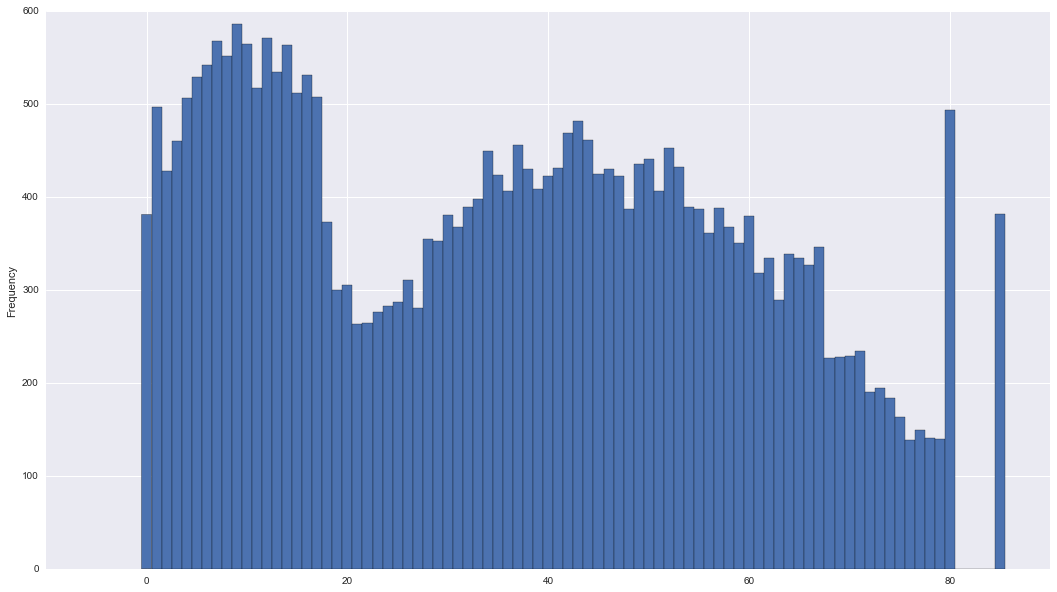

In [10]:
roster.TEAGE.plot.hist(bins = [x -.5 for x in range(0,87)])

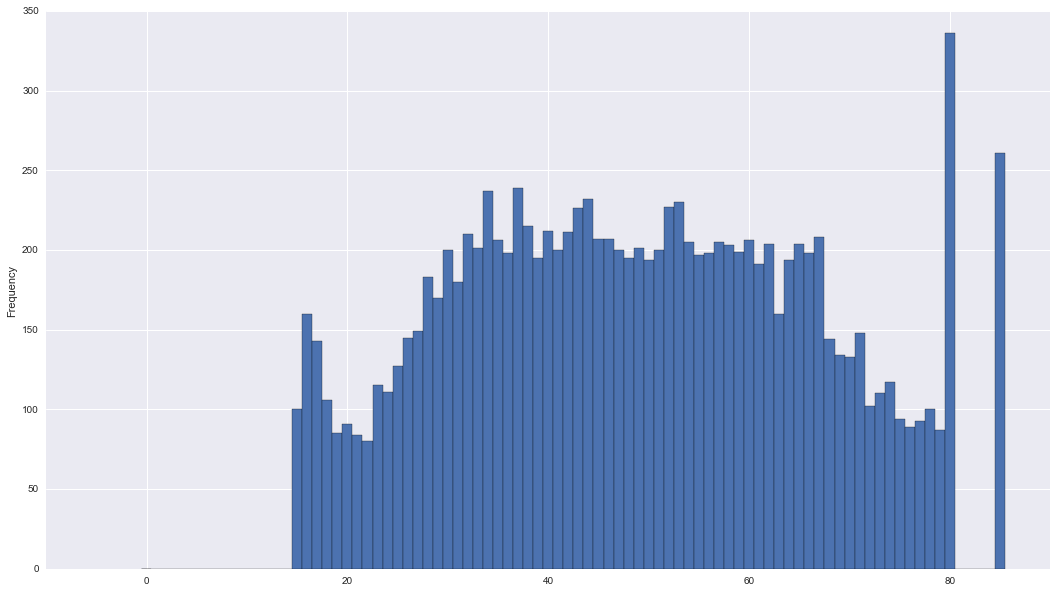

In [11]:
roster[roster.TULINENO ==1].TEAGE.plot.hist(bins = [x - .5 for x in range(0,87)])

In [12]:
activity[activity.TUCASEID ==20140301141395]

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,TRTONHH_LN,TRTO_LN,TUACTDUR,TUACTDUR24,TUCC5,TUCC5B,TUCC7,TUCC8,TUCUMDUR,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
37985,20140301141395,1,1,0,0,0,-1,0,-1,0,-1,0,60,60,0,0,0,97,60,60,-1,04:00:00,05:00:00,3,4,3,30403,304,0
37986,20140301141395,2,1,0,0,0,-1,0,-1,0,-1,0,45,45,1,0,0,0,105,105,-1,05:00:00,05:45:00,3,1,1,30101,301,0
37987,20140301141395,3,1,5,5,0,-1,5,-1,5,-1,5,5,5,1,0,0,0,110,110,-1,05:45:00,05:50:00,2,2,1,20201,202,0
37988,20140301141395,4,1,20,20,0,-1,20,-1,20,-1,20,20,20,1,0,0,0,130,130,-1,05:50:00,06:10:00,12,3,3,120303,1203,0
37989,20140301141395,5,-1,10,10,0,-1,10,-1,10,-1,10,10,10,1,0,0,0,140,140,-1,06:10:00,06:20:00,1,2,1,10201,102,0
37990,20140301141395,6,9,5,5,0,-1,5,-1,5,-1,5,5,5,1,0,0,0,145,145,-1,06:20:00,06:25:00,18,7,3,180703,1807,0
37991,20140301141395,7,15,15,15,0,-1,15,-1,15,-1,15,15,15,1,0,0,0,160,160,-1,06:25:00,06:40:00,18,7,3,180703,1807,0
37992,20140301141395,8,15,2,2,0,-1,2,-1,2,-1,2,2,2,1,0,0,0,162,162,-1,06:40:00,06:42:00,18,7,3,180703,1807,0
37993,20140301141395,9,15,15,15,0,-1,15,-1,15,-1,15,15,15,1,0,0,0,177,177,-1,06:42:00,06:57:00,18,7,3,180703,1807,0
37994,20140301141395,10,9,2,2,0,-1,2,-1,2,-1,2,2,2,1,0,0,0,179,179,-1,06:57:00,06:59:00,18,7,3,180703,1807,0


In [13]:
who[who.TUCASEID == 20140301141395]#['TUACTIVITY_N'].value_c

,TUCASEID,TUACTIVITY_N,TRWHONA,TULINENO,TUWHO_CODE
49191,20140301141395,1,0,2,24
49192,20140301141395,2,0,3,22
49193,20140301141395,3,0,1,18
49194,20140301141395,4,0,1,18
49195,20140301141395,5,1,-1,-1
49196,20140301141395,6,0,3,22
49197,20140301141395,6,0,4,22
49198,20140301141395,7,0,3,22
49199,20140301141395,7,0,4,22
49200,20140301141395,8,0,3,22


hefaminc -> income

teage -> age


In [14]:
summary.t120302.sum()

4721

In [49]:
a = [x for x in summary.columns if x.startswith('t12')]
b = []
for i in a:
    b.append(summary[i].sum())

In [50]:
summary['liesure'] = summary[a].sum(axis = 1)

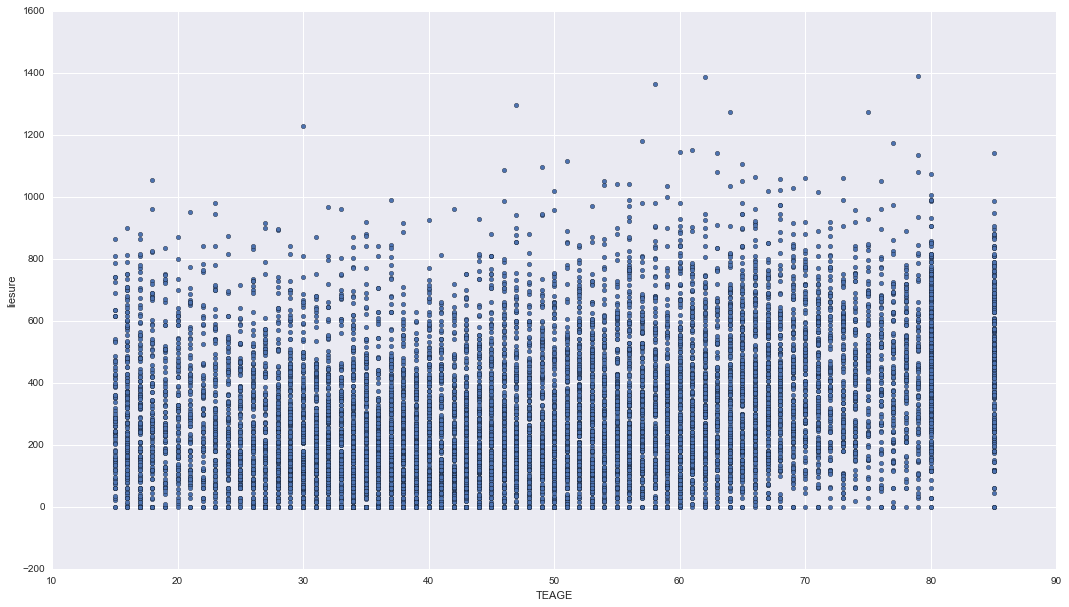

In [17]:
summary.plot(kind = 'scatter', x = 'TEAGE', y= 'liesure')

In [52]:
sex_dict = {1:"Male",2:"Female"}
summary['SEX'] = [sex_dict[x] for x in summary.TESEX]
a = summary.groupby(['TEAGE',"SEX"])["liesure"].mean()
b = a.unstack()
b.plot()

KeyError: 'Female'

Int64Index([1, 2], dtype='int64', name='TESEX')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11155f390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111ddad68>]], dtype=object)

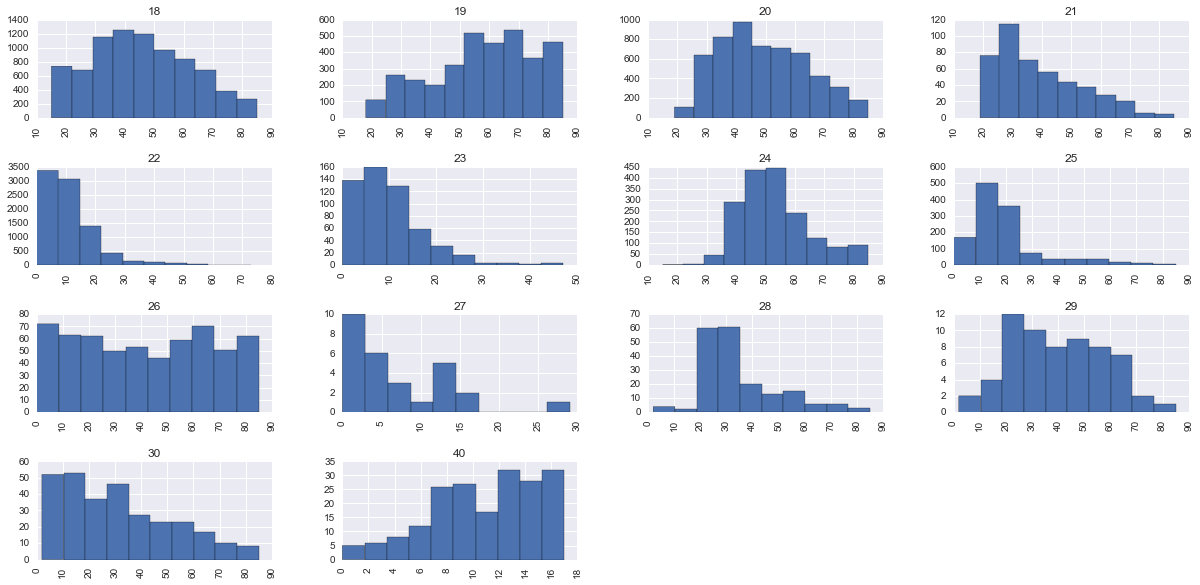

In [20]:
roster.TEAGE.hist(by=roster["TERRP"],figsize = (20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111823b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112b03d30>]], dtype=object)

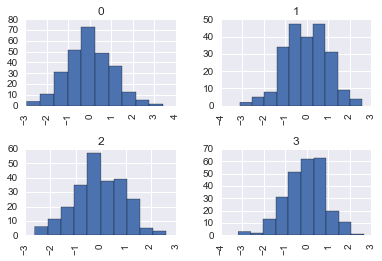

In [21]:
data = pd.Series(np.random.randn(1000))

data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

In [22]:
data

0      0.851341
1     -0.186984
2     -0.235423
3      1.284400
4     -0.015446
5     -1.536082
6      0.293307
7      0.567744
8      0.457582
9      0.883677
10     0.255778
11    -0.036036
12     0.803207
13    -2.389030
14     1.001859
15     0.929769
16    -0.717070
17     1.151921
18    -0.110998
19     0.242968
20    -0.009229
21    -1.167398
22    -1.130586
23    -1.282134
24     1.580668
25    -1.693665
26     1.615661
27    -0.200360
28     0.217669
29    -0.202856
         ...   
970   -0.606203
971   -1.114926
972   -0.603177
973    1.409166
974   -1.804160
975    0.595737
976    0.268719
977    0.182235
978   -0.849456
979   -0.688354
980    0.394344
981   -1.850815
982   -0.133196
983    1.593482
984    1.026035
985   -0.245715
986    2.031083
987   -0.149402
988   -0.388861
989   -0.646299
990    1.157890
991    0.439559
992    1.086823
993    0.231436
994   -0.788688
995   -0.185816
996    1.200555
997    0.022388
998    1.667126
999   -0.535870
dtype: float64

In [23]:
hist_data = [random.random() for i in range(100)]

In [24]:
hist_data2 = [random.normalvariate(.5,.2) for i in range(100)]

([array([  878.,   888.,  1035.,  1110.,  1137.,  1081.,  1105.,  1075.,
          1038.,   673.,   568.,   540.,   570.,   591.,   708.,   748.,
           787.,   872.,   862.,   838.,   853.,   950.,   886.,   852.,
           822.,   847.,   885.,   776.,   749.,   718.,   697.,   623.,
           672.,   673.,   455.,   463.,   384.,   347.,   287.,   281.,
           493.,     0.,   382.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,  100.,  303.,
          191.,  175.,  195.,  238.,  294.,  353.,  380.,  411.,  443.,
          437.,  410.,  412.,  437.,  439.,  407.,  396.,  394.,  457.,
          402.,  403.,  402.,  397.,  364.,  398.,  406.,  278.,  281.,
          212.,  211.,  182.,  187.,  336.,    0.,  261.])],
 array([ -0.5,   1.5,   3.5,   5.5,   7.5,   9.5,  11.5,  13.5,  15.5,
         17.5,  19.5,  21.5,  23.5,  25.5,  27.5,  29.5,  31.5,  33.5,
         35.5,  37.5,  39.5,  41.5,  43.5,  45.5,  47.5,  49.5,  51.5,
         53.5,  55.5,  57.5,  59.5,  6

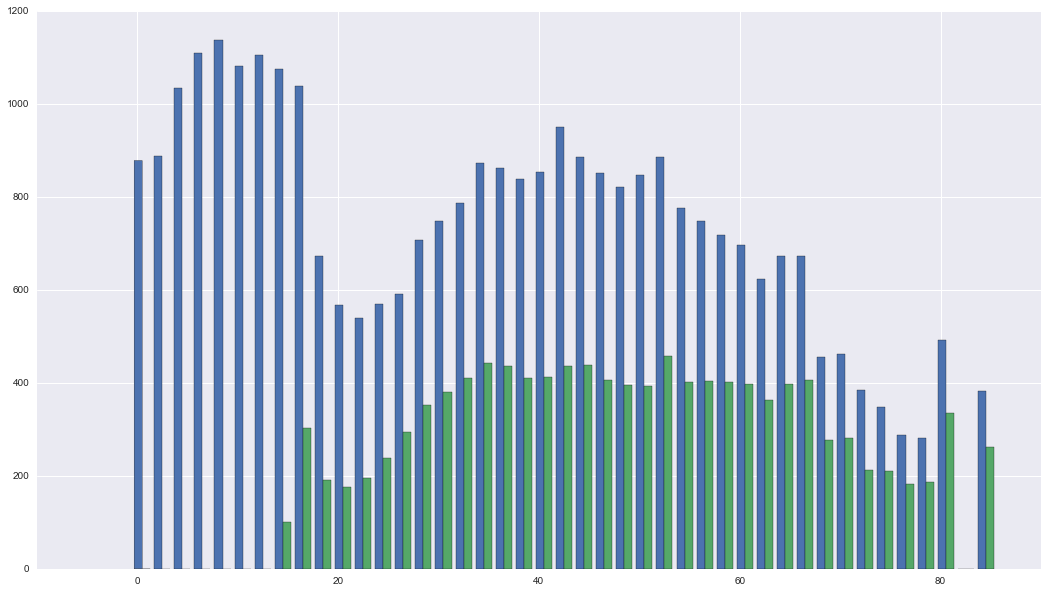

In [25]:
plt.hist([roster.TEAGE,roster[roster.TERRP <= 19].TEAGE], bins = [x-.5 for x in range(0,87,2)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112899908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112e48080>], dtype=object)

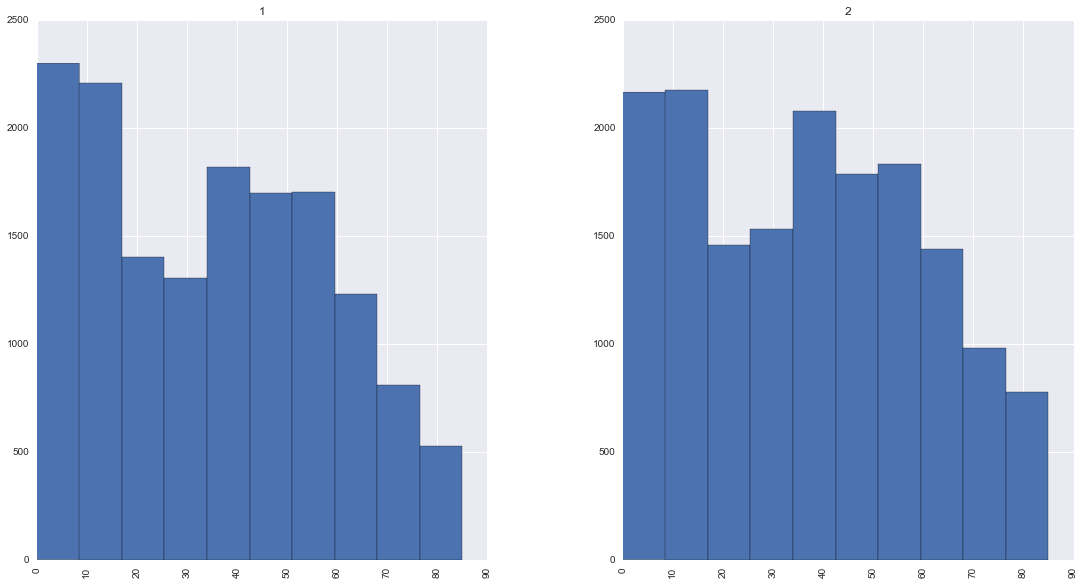

In [26]:
roster.hist(column = 'TEAGE',by='TESEX',layout = (1,2))

In [27]:
a = pd.DataFrame({'value':np.arange(30)})
a['even'] = [x%2 == 0 for x in a.value]
a['threes'] = [x//3 for x in a.value]
a

,value,even,threes
0,0,True,0
1,1,False,0
2,2,True,0
3,3,False,1
4,4,True,1
5,5,False,1
6,6,True,2
7,7,False,2
8,8,True,2
9,9,False,3


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_axisbg',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',
 '_

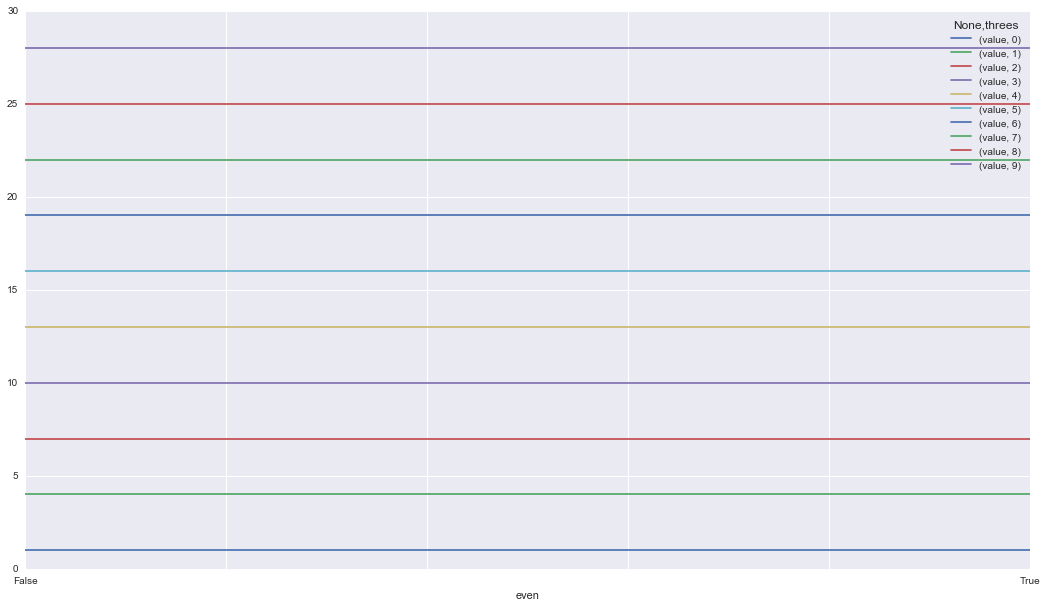

In [38]:
b = a.groupby(["even",'threes']).mean().unstack().plot()
dir(b)

In [39]:
dir(pd)

['Categorical',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'ExcelFile',
 'ExcelWriter',
 'Expr',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int64Index',
 'MultiIndex',
 'NaT',
 'Panel',
 'Panel4D',
 'Period',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseArray',
 'SparseDataFrame',
 'SparseList',
 'SparsePanel',
 'SparseSeries',
 'SparseTimeSeries',
 'Term',
 'TimeGrouper',
 'TimeSeries',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'WidePanel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_np_version',
 '_np_version_under1p10',
 '_np_version_under1p11',
 '_np_version_under1p8',
 '_np_version_under1p9',
 '_period',
 '_sparse',
 '_testing',
 '_version',
 'algos',
 'bdate_range',
 'compat',
 'computation',
 'concat',
 'core',
 'crosstab',
 'cut',
 'date_range',
 'datetime',
 'datetools',
 'dependency',
 'describe_

In [41]:
type(pd.DataFrame.groupby)

function

In [56]:
a = pd.DataFrame({'value':np.arange(30)})
a['even'] = [x%2 == 0 for x in a.value]
a['fours'] = [x//4 for x in a.value]
b = att.to_plot_category_vs_x(a,'even','fours',"mean")["value"]
c = pd.MultiIndex.from_tuples()
b

even,False,True
fours,,
0,2,1
1,6,5
2,10,9
3,14,13
4,18,17
5,22,21
6,26,25
7,29,28


In [60]:
arrays1 = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples1 = list(zip(*arrays1))
index1 = pd.MultiIndex.from_tuples(tuples1, names=['first', 'second'])
df1 = pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=index1)
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.051576 -0.938545  0.562377  0.052330 -0.886514 -0.456435  1.086084   
B      -0.157424  1.593730 -0.839935  1.245412  0.216894 -0.571918  1.137278   
C       0.066959  1.889615  0.030374  0.292562 -2.723239  0.760281 -1.659389   

first             
second       two  
A       0.217724  
B       1.329052  
C       0.348726

In [79]:
tuples2=[(False,),(True,)]
index2 = pd.MultiIndex.from_tuples(tuples2, names=['even'])
idx2 = pd.Series(list(range(8))).rename("fours")
df2 = pd.DataFrame([[2,1],[6,5],[10,9],[14,13],[18,17],[22,21],[26,25],[29,28]],index = idx2,columns=index2)
# arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
#           ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
# tuples = list(zip(*arrays))
# index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
# df = pd.DataFrame(np.random.randn(3, 8), index=['A', 'B', 'C'], columns=index)
df2

even,False,True
fours,,
0,2,1
1,6,5
2,10,9
3,14,13
4,18,17
5,22,21
6,26,25
7,29,28


In [75]:
b

even,False,True
fours,,
0,2,1
1,6,5
2,10,9
3,14,13
4,18,17
5,22,21
6,26,25
7,29,28


In [81]:
b == df2

even,False,True
fours,,
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
